#Sesión 10 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aprenderás a evaluar algoritmos de machine learning en base a su entrenamiento y las pruebas realizadas.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---

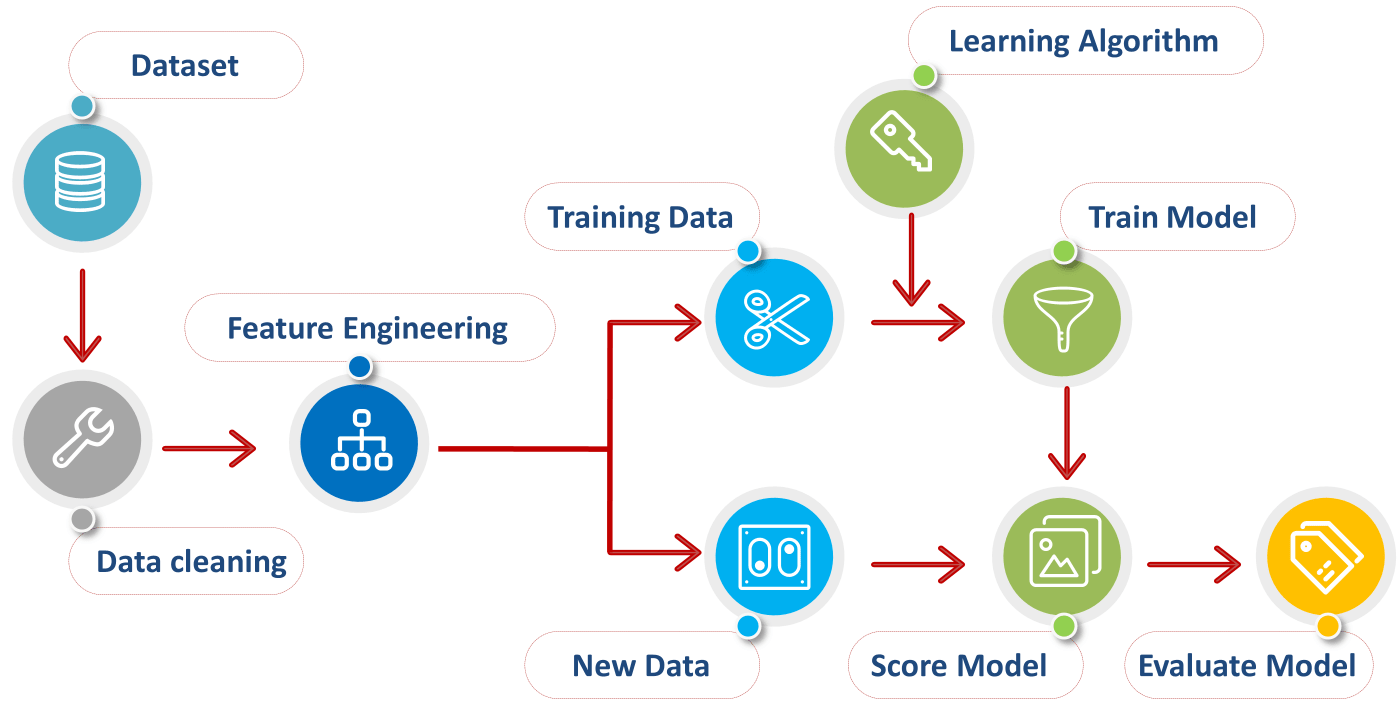

Fuente imagen: http://www.cs.us.es/~fsancho/?e=231


En este dataset está cargado el archivo de la predicción del clima: weather.csv.

Recuerda cargarlo de la forma correcta relacionado a la herramienta que estés utilizando (cloud o local)

In [62]:
nums = [48, 6, 9, 21, 1]
square_all = map(lambda x: x ** 2, nums)
square_all

In [1]:
#Configuración básica inicial
%pylab inline
#Importación de Pandas, Seaborn, Numpy y Matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("precision",5)
####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
# importa libreria para obtener las metricas de la matriz de confusión
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [3]:
df  = pd.read_csv('weather.csv')
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [67]:
nums = [48, 6, 9, 21, 1]
square_all = map(lambda x: x ** 2, nums)
list(square_all)

[2304, 36, 81, 441, 1]

In [4]:
df.drop(['WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],inplace=True,axis=1)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,No,0.0,No


<AxesSubplot:>

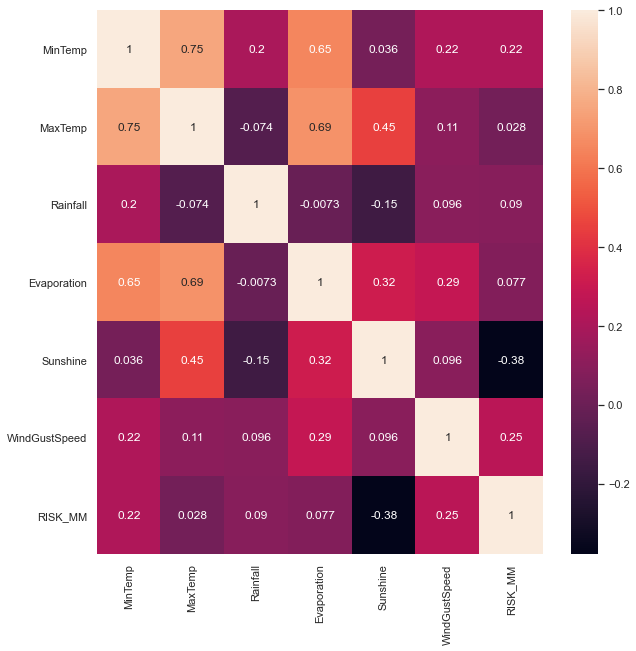

In [5]:
sns.set(
    rc={
        'figure.figsize':(10,10)
    }
)
sns.heatmap(
    df.corr(),
    annot=True
)

In [6]:
#Uso de LabelEncoder para transformar las variables categóricas a numéricas
df.columns
col_texto = ['WindGustDir','RainToday','RainTomorrow']
labelEncoder = LabelEncoder()
for col in col_texto:
  df[col+'_procesada'] = labelEncoder.fit_transform(df[col].astype(str))
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RISK_MM,RainTomorrow,WindGustDir_procesada,RainToday_procesada,RainTomorrow_procesada
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,No,3.6,Yes,7,0,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,Yes,3.6,Yes,1,1,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,Yes,39.8,Yes,7,1,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,Yes,2.8,Yes,7,1,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,Yes,0.0,No,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,No,0.0,No,6,0,0
362,7.1,28.4,0.0,11.6,12.7,N,48.0,No,0.0,No,3,0,0
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,No,0.0,No,2,0,0
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,No,0.0,No,7,0,0


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'RainToday', 'RISK_MM', 'RainTomorrow',
       'WindGustDir_procesada', 'RainToday_procesada',
       'RainTomorrow_procesada'],
      dtype='object')


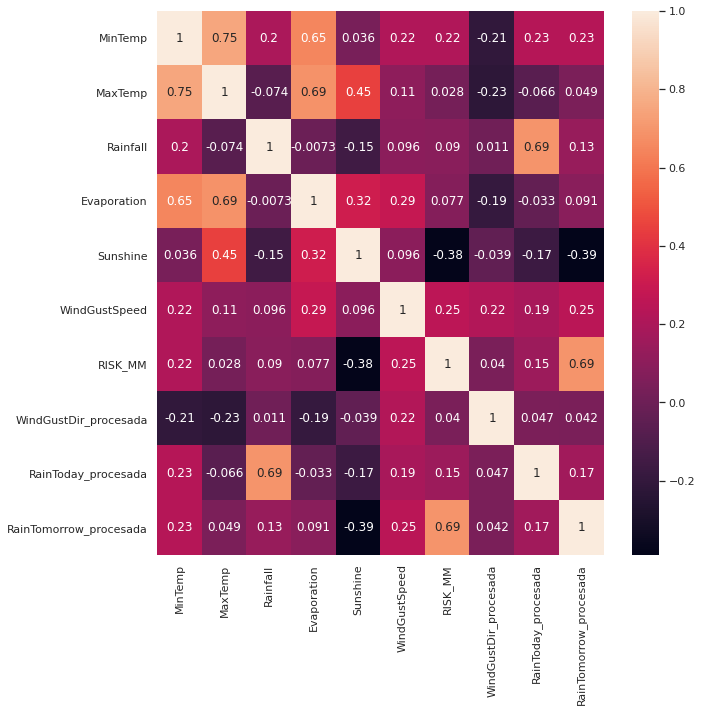

In [ ]:
sns.heatmap(
    df.corr(),
    annot=True
)
print(df.columns)

In [7]:
caracteristicas = df[['MinTemp',
                      'MaxTemp',
                      'RISK_MM',
                      'WindGustDir_procesada',
                      'RainToday_procesada']].astype(np.float)
label = df['RainTomorrow_procesada']
print(caracteristicas)
print(label)

     MinTemp  MaxTemp  RISK_MM  WindGustDir_procesada  RainToday_procesada
0        8.0     24.3      3.6                    7.0                  0.0
1       14.0     26.9      3.6                    1.0                  1.0
2       13.7     23.4     39.8                    7.0                  1.0
3       13.3     15.5      2.8                    7.0                  1.0
4        7.6     16.1      0.0                   10.0                  1.0
..       ...      ...      ...                    ...                  ...
361      9.0     30.7      0.0                    6.0                  0.0
362      7.1     28.4      0.0                    3.0                  0.0
363     12.5     19.9      0.0                    2.0                  0.0
364     12.5     26.9      0.0                    7.0                  0.0
365     12.3     30.2      0.0                    7.0                  0.0

[366 rows x 5 columns]
0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363 

In [9]:
datos_entre,datos_prueba,eti_entre,eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size=0.25,
    random_state=2
)
print('Los datos para entrenamiento son :',datos_entre.shape)
print('Los datos para prueba son :',datos_prueba.shape)
print('Los eti para entrenamiento son :',eti_entre.shape)
print('Los eti para prueba son :',eti_prueba.shape)

Los datos para entrenamiento son : (274, 5)
Los datos para prueba son : (92, 5)
Los eti para entrenamiento son : (274,)
Los eti para prueba son : (92,)


In [ ]:
print(datos_entre)
print(eti_entre)
datos_entre.join(eti_entre)

     MinTemp  MaxTemp  RISK_MM  WindGustDir_procesada  RainToday_procesada
292     -5.3     13.1      0.0                    7.0                  0.0
354     11.3     27.4      0.0                    7.0                  0.0
186      0.4     19.0      0.0                    7.0                  0.0
243      5.3     11.7      0.2                    7.0                  1.0
60      13.8     33.5      0.0                    4.0                  0.0
..       ...      ...      ...                    ...                  ...
299     -1.5     17.3      0.0                    7.0                  0.0
22      12.8     18.5      0.4                    2.0                  1.0
72      20.9     35.7      2.0                   12.0                  0.0
15      12.4     32.1      0.0                    0.0                  0.0
168      5.3     21.0      0.0                   14.0                  0.0

[274 rows x 5 columns]
292    0
354    0
186    0
243    0
60     0
      ..
299    0
22     0
72  

,MinTemp,MaxTemp,RISK_MM,WindGustDir_procesada,RainToday_procesada,RainTomorrow_procesada
292,-5.3,13.1,0.0,7.0,0.0,0
354,11.3,27.4,0.0,7.0,0.0,0
186,0.4,19.0,0.0,7.0,0.0,0
243,5.3,11.7,0.2,7.0,1.0,0
60,13.8,33.5,0.0,4.0,0.0,0
...,...,...,...,...,...,...
299,-1.5,17.3,0.0,7.0,0.0,0
22,12.8,18.5,0.4,2.0,1.0,0
72,20.9,35.7,2.0,12.0,0.0,1
15,12.4,32.1,0.0,0.0,0.0,0


In [10]:
eti_prueba.value_counts()

0    76
1    16
Name: RainTomorrow_procesada, dtype: int64

In [12]:
eti_entre.value_counts()

0    224
1     50
Name: RainTomorrow_procesada, dtype: int64

In [13]:
# DecisionTreeClassifier
# LinearRegression
# KNeighborsClassifier
modelos = []
modelos.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
modelos.append(('LinearRegression',LinearRegression()))
modelos.append(('KNeighborsClassifier',KNeighborsClassifier()))
resultados = []
for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba,eti_prueba)
  resultados.append(resultado*100)
  print('El modelo {} tiene como resultado {:.2f}%'.format(
      nombre,
      resultado*100
  ))

El modelo DecisionTreeClassifier tiene como resultado 100.00%
El modelo LinearRegression tiene como resultado 46.85%
El modelo KNeighborsClassifier tiene como resultado 93.48%


In [ ]:
print(eti_entre.value_counts())
print(pd.Series(modelos[2][1].predict(datos_entre)).value_counts())

0    224
1     50
Name: RainTomorrow_procesada, dtype: int64
0    241
1     33
dtype: int64


## Obteniendo los términos asociados a la matriz de confusión
* Verdaderos positivos
* Verdaderos negativos
* Falsos positivos
* Falsos negativos


[[224   0]
 [ 17  33]]
[[ 33  17]
 [  0 224]]


Text(84.5, 0.5, 'Actual')

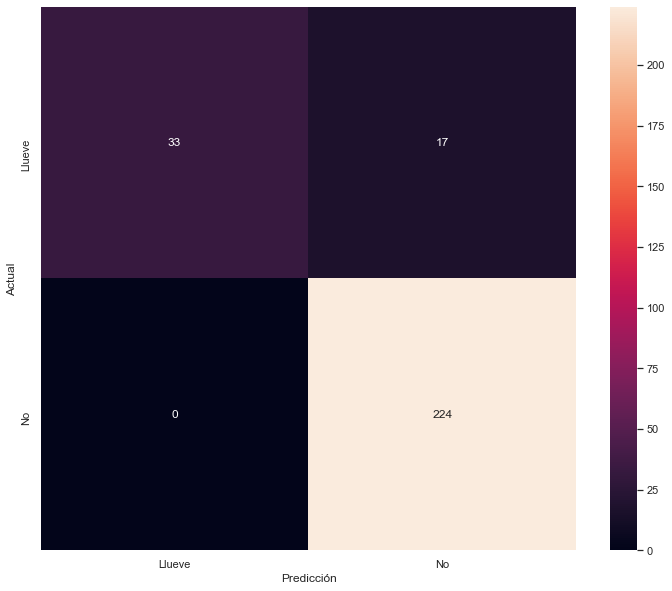

In [24]:
datos_predict = modelos[2][1].predict(datos_entre)
confusion = confusion_matrix(eti_entre,datos_predict)
print(confusion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vn,fp,fn,vp = confusion.ravel()
matriz = np.array([[vp,fn],[fp,vn]])
print(matriz)
plt.figure(
    figsize=(12,10)
)
grafico = plt.subplot()

sns.heatmap(matriz,annot=True,ax=grafico,
            fmt='g')
grafico.xaxis.set_ticklabels(["Llueve",
                              "No"])
grafico.yaxis.set_ticklabels(["Llueve","No"])
grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')

In [32]:
Acc= 100*(vp+vn)/(vp+vn+fp+fn)
Ss= 100*(vp)/(vp+fn)
VPN= 100*(vn)/(vn+fn)
print(Acc)
print(Ss)
print(VPN)

93.7956204379562
66.0
92.9460580912863


In [26]:
prueba_predict = modelos[2][1].predict(datos_prueba)
confusionprueba = confusion_matrix(eti_prueba,prueba_predict)
#print(confusionprueba)
vnpr,fppr,fnpr,vppr = confusionprueba.ravel()
matrizprueba = np.array([[vppr,fnpr],[fppr,vnpr]])
print(matrizprueba)


[[10  6]
 [ 0 76]]


In [33]:
print(100*(vppr+vnpr)/(vppr+vnpr+fppr+fnpr))
print(100*(vppr)/(vppr+fnpr))
print(100*(vnpr)/(vnpr+fnpr))

93.47826086956522
62.5
92.6829268292683


[[ 33  17]
 [  0 224]]


Text(84.5, 0.5, 'Actual')

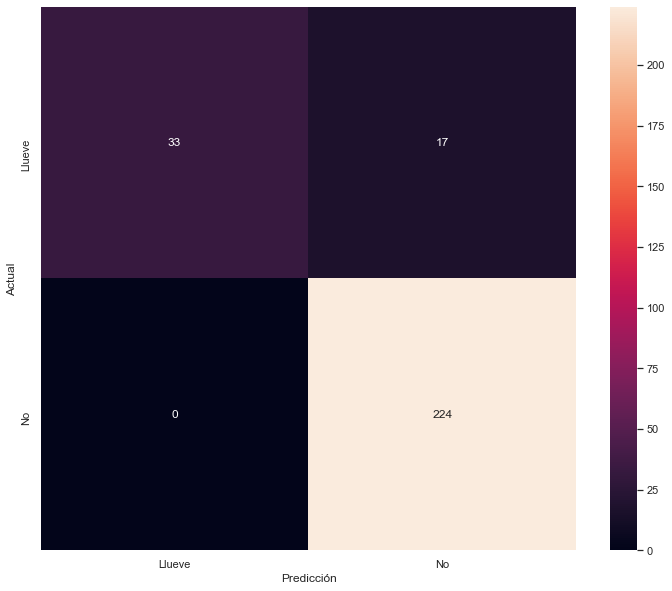

In [34]:
datos_predictregresion = modelos[1][1].predict(datos_entre)
confusionregresion = confusion_matrix(eti_entre,datos_predict)
#print(confusionregresion)
# orden de retorno:
# verdaderos negativo
# falsos positivos
# falsos negativos
# verdaderos positivos
# v1,v2,v3,v4=[1,2,3,4]
vnreg,fpreg,fnreg,vpreg = confusionregresion.ravel()
matrizreg = np.array([[vpreg,fnreg],[fpreg,vnreg]])
print(matrizreg)
plt.figure(
    figsize=(12,10)
)
graficoreg = plt.subplot()

sns.heatmap(matrizreg,annot=True,ax=graficoreg,
            fmt='g')
graficoreg.xaxis.set_ticklabels(["Llueve",
                              "No"])
graficoreg.yaxis.set_ticklabels(["Llueve","No"])
graficoreg.set_xlabel('Predicción')
graficoreg.set_ylabel('Actual')

In [35]:
Accreg= 100*(vpreg+vnreg)/(vpreg+vnreg+fpreg+fnreg)
Ssreg= 100*(vpreg)/(vpreg+fnreg)
VPNreg= 100*(vnreg)/(vnreg+fnreg)
print(Accreg)
print(Ssreg)
print(VPNreg)

93.7956204379562
66.0
92.9460580912863


In [39]:
round(1.51)

2

In [44]:
prueba_predictreg = modelos[1][1].predict(datos_prueba)
prueba_predictreg.shape[0]

92

In [45]:
prueba_predictreground = prueba_predictreg.shape[0]*[np.nan]

In [70]:
for i in range(prueba_predictreg.shape[0]):
    prueba_predictreground[i]=round(prueba_predictreg[i])
pd.Series(prueba_predictreground).value_counts()

0    86
1     6
dtype: int64

In [71]:
list(map(lambda x: round(x), prueba_predictreg))

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [48]:
confusionpruebareg = confusion_matrix(eti_prueba,prueba_predictreground)
#print(confusionprueba)
vnprreg,fpprreg,fnprreg,vpprreg = confusionpruebareg.ravel()
matrizpruebareg = np.array([[vpprreg,fnprreg],[fpprreg,vnprreg]])
print(matrizpruebareg)

[[ 6 10]
 [ 0 76]]


In [51]:
82/92

0.8913043478260869

## Métricas de rendimiento
El uso de estas métricas es poder calcular o identificar de mejor manera del rendimiento de nuestros modelos, son métricas estándar.
* Exactitud
* Precisión
* Sensibilidad
* Especificidad
* Puntaje F1


## Exactitud / accuracy_score
Es la cantidad de predicciones correctas, en base al total de predicciones realizadas<br>
vp+vn/vp+fp+fn+vn
-----
El conocer la exactitud, no es realmente una medida validad para conocer el rendimiento real del modelo, hay muchos factores que juegan en contra, por ejemplo.<br>
Si nosotros construimos un modelo, en donde la cantidad de elementos a predecir (Verdaderos/Falsos) es desigual (80/10) obtendremos un mal modelo construido y entrenado. <br>
Esto se puede desencadenar que quizás, tengamos un modelo que sea bueno prediciendo datos, pero al estar construido de forma desigual (desbalanceada) no lo hace confiable.


In [52]:
from sklearn.metrics import accuracy_score
exactitud = (vp+vn)/(vp+fp+fn+vn)
print(exactitud)
accuracy_score(eti_entre,datos_predict)


0.9379562043795621


0.9379562043795621

## Precisión/precision_score
Precisión
Este índice nos ayuda a conocer el desempeño en base a los datos predichos positivamente. <br>
Es decir, usaremos los verdaderos positivos vs todos los elementos positivos obtenidos
vp/vp+fp
------
Conocer la precisión nos ayudará a determinar que tantos elementos positivos puede detectar nuestro modelo y saber su precisión ante estos casos.


In [53]:
from sklearn.metrics import precision_score
precision = (vp)/(vp+fp)
print(precision)
precision_score(eti_entre,datos_predict) 

1.0


1.0

In [55]:
precision_score(eti_prueba,prueba_predictreground) 

1.0

## Sensibilidad / recall_score
La sensibilidad nos ayuda a determinar la cantidad de elementos que fueron predichos correctamente, antes los datos reales<br>
vp/vp+fn
-----
Esto nos permite conocer el porcentaje de sensibilidad que tienes nuestro modelo predictor en base a los datos reales esperados.

In [56]:
from sklearn.metrics import recall_score
recall = (vp)/(vp+fn)
print(recall)
recall_score(eti_entre,datos_predict)

0.66


0.66

In [57]:
recall_score(eti_prueba,prueba_predictreground) 

0.375

## Especificidad (Tasa negativa real TNR)
Este índice nos ayuda a conocer el desempeño de nuestro modelo prediciendo los datos negativamente, es decir, usaremos los verdaderos negativos vs todos los negativos obtenidos. <br>
vn/vn+fp
------
El conocer la tasa negativa real, nos ayudara a identificar el comportamiento del modelo ante los casos que deban ser negativos de los esperados.


In [58]:
tnr = (vn)/(vn+fp)
tnr

1.0

## Puntaje F1 / f1_score
Los índices mas importantes, para definir la precisión de nuestro modelo son los:
* Precisión
* Sensibilidad<br>
----
Ya que nos ayudan a determinar el comportamiento del modelo en base a los datos reales esperados, por lo tanto, para evitar calcular dichos factores constantemente, podemos obtener un valor único que nos representa un comportamiento global de nuestro modelo.<br>
2 * precision * sensibilidad/precision + sensibilidad

In [59]:
from sklearn.metrics import f1_score
f1 =(2 * recall * precision) / (precision + recall)
print(f1)
f1_score(eti_entre,datos_predict)

0.7951807228915663


0.7951807228915663

In [60]:
f1_score(eti_prueba,prueba_predictreground) 

0.5454545454545454

## ROC - AUC
ROC = Característica de funcionamiento del receptor
<br>
AUC = Área bajo la curva<br>
### ROC
Esta curva, nos permite determinar que tan bueno es el desempeño de nuestro modelo para distinguir las variables que se están calificando.<br>
Un buen modelo, puede distinguir con precisión entre los elementos a calificar, mientras un modelo pobre o mal entrenado tendrá dificultad para hacerlo.<br>
Esto se ve reflejado al predecir una información y tenemos mas de un caso que el otro.<br>
### AUC
Esta curva, significa el Área bajo la Curva Roc, en pocas palabras significa que mida toda el área bidimensional por debajo de la curva ROC.


Para poder calcular dichas métricas de rendimiento debemos usar los siguientes indicadores:
*     Tasa de verdaderos positivos (TPR) / Sensibilidad
*     Tasa de verdaderos negativos (FPR) / Especificidad – TRN<br/>
Al realizar la curva ROC – AUC podemos obtener los siguientes resultados:
---




### 1- El mejor de los casos:
Al tener este comportamiento, estamos observando que nuestro modelo no tiene problemas discriminar las diferentes clases (0 y 1), por lo tanto, es un modelo bien entrenado. 
![ROC Mejor de los casos](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-4.png)
<br>
Reflejado con Sklearn:<br>
![Mejor de los casos](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-5.png)<br>

### 2. Adivinanza al azar
En simples palabras, nuestro modelo tiene un comportamiento similar para ambos casos en un ratio de 50% de precisión, esto provoca que el modelo no discrimine correctamente los diferentes casos (0 y 1) 
![Adivinanza al azar](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-6.png)<br>
Reflejado en Sklearn:<br>
![Adivinanza al azar](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-7.png)


### 3. El peor de los casos
En el peor de los casos nuestro modelo no es capaz de tener ningún tipo de discriminación en los casos, por lo cual, los invierte y sería el caso contrario al mejor de los escenario.<br>
![El peor de los casos](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-8.png)<br>
Reflejado con Sklearn:<br>
![El peor de los casos](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-9.png)


### 4. Caso habitual
Generalmente, nunca obtendremos el mejor de los resultados (1), pero sin embargo siempre obtendremos un porcentaje algo en la medición de nuestro modelo, por lo tanto, podemos decir que nuestro modelo no es 100 sensible, pero es lo suficientemente capaz de distinguir los diferentes casos.<br>
![Caso habitual](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-10.png)

In [ ]:
contrario = [(0 if eti_entre.values[pivote] == 1 else 1) for pivote in range(len(eti_entre))]
base = [0 for pivote in range(len(eti_entre))]
arbol = modelos[2][1].predict(datos_entre)

In [ ]:
# Calcular el porcentaje ROC-AUC
from sklearn.metrics import roc_auc_score
puntaje_arbol = roc_auc_score(eti_entre,datos_predict)
puntaje_base = roc_auc_score(eti_entre,base)
puntaje_contrario = roc_auc_score(eti_entre,contrario)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'lower rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


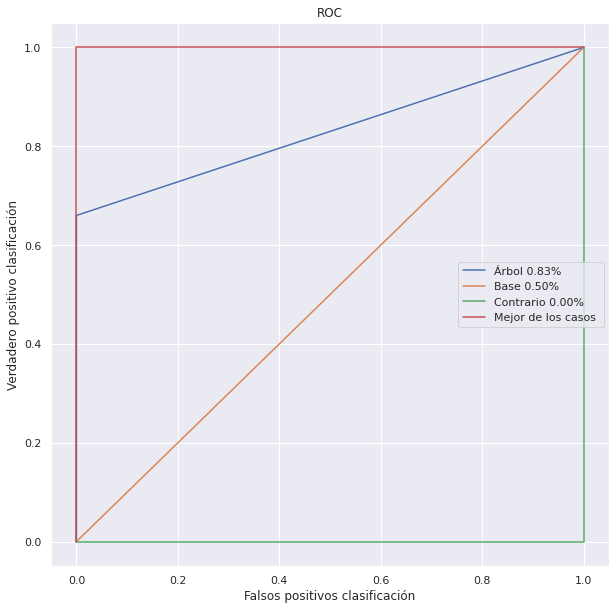

In [ ]:
from sklearn.metrics import roc_curve
arbol_FPR,arbol_VPR,_ = roc_curve(eti_entre,datos_predict)
base_FPR,base_VPR,_ = roc_curve(eti_entre,base)
contrario_FPR,contrario_VPR,_ = roc_curve(eti_entre,contrario)
mejor_FPR,mejor_VPR,_ = roc_curve(eti_entre,eti_entre)

plt.plot(arbol_FPR,arbol_VPR,label="Árbol {:.2f}%".format(puntaje_arbol))
plt.plot(base_FPR,base_VPR,label="Base {:.2f}%".format(puntaje_base))
plt.plot(contrario_FPR,contrario_VPR,label="Contrario {:.2f}%".format(puntaje_contrario))
plt.plot(mejor_FPR,mejor_VPR,label="Mejor de los casos ")
plt.title('ROC')
plt.xlabel('Falsos positivos clasificación')
plt.ylabel('Verdadero positivo clasificación')
plt.legend(loc='lower rigth')
plt.show()

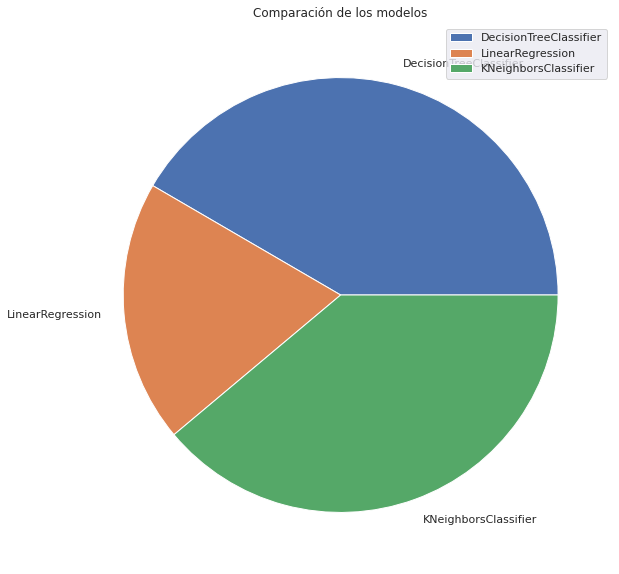

In [ ]:
plt.figure(
    figsize=(10,10)
)
plt.pie(
    resultados,
    labels=['DecisionTreeClassifier','LinearRegression','KNeighborsClassifier']
)
plt.legend()
plt.title('Comparación de los modelos')
plt.show()

In [ ]:
mejor_modelo = modelos[0][1]
mejor_modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
df['predecir'] = mejor_modelo.predict(df[['MinTemp',
    'MaxTemp',
    'RISK_MM',
    'WindGustDir_procesada',
    'RainToday_procesada']])
df[['RainTomorrow_procesada','predecir']]

,RainTomorrow_procesada,predecir
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
361,0,0
362,0,0
363,0,0
364,0,0
